In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from load_data import GetZeoliteTsv
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
np.random.seed(1)

In [2]:
#zeolite datafile exported from excel
zeolite_fname = "C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML\\zeolites database catagories june data base.txt"

In [3]:
#open the raw tsv data file 
#the file has to be correctly formatted with columns headers  
zeolite_fileObj = open(zeolite_fname)

In [4]:
#create an instance to start processing the datafile
getZeo = GetZeoliteTsv(zeolite_fileObj)

In [5]:
#Sanity check of datatypes
#important to recognise that datatypes are detected from the files
#this step alsos makes the string variables as categorical variables
getZeo.set_dtypes()

,Adsorbent,SA,Vmicro,Vmeso,pore_size,Si_Al,Na+,Ag+,Cu+,Ce+3,...,adsorbate,dipole_moment,chemical_hardness,kinetic_diameter,C_0,Ce,solvent,oil_adsorbent_ratio,Temp,Capacity
0,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,TP,0.57,3.0401,0.77,291,126,cyclohexane,125,50,16.0
1,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,TP,0.57,3.0401,0.77,420,174,cyclohexane,125,50,24.0
2,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,TP,0.57,3.0401,0.77,556,238,cyclohexane,125,50,31.0
3,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,TP,0.57,3.0401,0.77,719,367,cyclohexane,125,50,34.3
4,CuAgY,591.00,0.295,NaN,NaN,2.43,0.02,0.47,0.260,NaN,...,TP,0.57,3.0401,0.77,833,468,cyclohexane,125,50,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,TP,0.51,3.0401,0.77,1100,468,cyclohexane,20,30,9.8
352,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,TP,0.51,3.0401,0.77,1219,545,cyclohexane,20,30,10.5
353,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,TP,0.51,3.0401,0.77,1321,622,cyclohexane,20,30,10.9
354,CuHY,399.29,0.190,NaN,NaN,3.40,0.40,NaN,0.467,NaN,...,TP,0.51,3.0401,0.77,1418,700,cyclohexane,20,30,11.2


In [6]:
#this counts the missing records per column and saves them to provided filename
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.00
Vmicro,Vmicro,7.30
Vmeso,Vmeso,73.31
pore_size,pore_size,40.45
Si_Al,Si_Al,0.00
Na+,Na+,41.85
Ag+,Ag+,68.82
Cu+,Cu+,76.69
Ce+3,Ce+3,64.33


In [7]:
#take note of number of columns
getZeo.zeolite_df.shape

(356, 34)

In [8]:
getZeo.df_dtypes

{'Adsorbent': 'category', 'adsorbate': 'category', 'solvent': 'category'}

In [9]:
#Drops empty columns inplace
getZeo.zeolite_df.dropna(how='all', axis=1, inplace = True)

In [10]:
getZeo.zeolite_df.columns

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na+',
       'Ag+', 'Cu+', 'Ce+3', 'Cs+1', 'Ni+1', 'x_Na+', 'x_Ag+', 'x_Cu+',
       'x_Ce+3', 'x_Cs+1', 'x_Ni+1', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+3',
       'R_Cs+1', 'R_Ni+1', 'adsorbate', 'dipole_moment', 'chemical_hardness',
       'kinetic_diameter ', 'C_0', 'Ce', 'solvent', 'oil_adsorbent_ratio',
       'Temp', 'Capacity'],
      dtype='object')

In [11]:
#Very that columns have indeed been lost
getZeo.zeolite_df.shape

(356, 34)

In [12]:
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.00
Vmicro,Vmicro,7.30
Vmeso,Vmeso,73.31
pore_size,pore_size,40.45
Si_Al,Si_Al,0.00
Na+,Na+,41.85
Ag+,Ag+,68.82
Cu+,Cu+,76.69
Ce+3,Ce+3,64.33


In [13]:
#miss = getZeo.missingness("ZeoX_Final_encoded.miss")

In [14]:
getZeo.GroupMeanImputation('Adsorbent','Vmicro')
getZeo.MeanImputation('Vmicro')

In [15]:
getZeo.GroupMeanImputation('Adsorbent','Vmeso')
getZeo.MeanImputation('Vmeso')

In [16]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [17]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

In [18]:
#Check categorical variables
getZeo.df_dtypes

{'Adsorbent': 'category', 'adsorbate': 'category', 'solvent': 'category'}

In [19]:
#convert the categorical variables to intergers also known as one-hot-encoding
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
getZeo.encode_categorical()

[     AgCeY  AgX  AgY  CeY  CsY  CuAgY  CuCeY  CuHY  CuX  CuY  MCM-22  NaY  \
0        0    0    0    0    0      1      0     0    0    0       0    0   
1        0    0    0    0    0      1      0     0    0    0       0    0   
2        0    0    0    0    0      1      0     0    0    0       0    0   
3        0    0    0    0    0      1      0     0    0    0       0    0   
4        0    0    0    0    0      1      0     0    0    0       0    0   
..     ...  ...  ...  ...  ...    ...    ...   ...  ...  ...     ...  ...   
351      0    0    0    0    0      0      0     1    0    0       0    0   
352      0    0    0    0    0      0      0     1    0    0       0    0   
353      0    0    0    0    0      0      0     1    0    0       0    0   
354      0    0    0    0    0      0      0     1    0    0       0    0   
355      0    0    0    0    0      0      0     1    0    0       0    0   

     NiCeY  NiY  clinoptilolite  
0        0    0               0  
1     

In [20]:
#for metal in ['C1', 'C2', 'C3', 'x1', 'x2', 'x3', 'Ri1', 'Ri2', 'Ri3']:
#       getZeo.zerofill(metal)

In [21]:
for metal in ['Na+','Ag+', 'Cu+', 'Ce+3', 'Cs+1', 'Ni+1', 'x_Na+', 'x_Ag+', 'x_Cu+','x_Ce+3', 'x_Cs+1', 'x_Ni+1', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+3','R_Cs+1','R_Ni+1']:
         getZeo.zerofill(metal)

In [22]:
#save the new data to a tsv file
#getZeo.save_zeo("ZeoX_Final_encoded_V2x.tsv")

In [23]:
#get our dataframe 
zeolite_final  =  getZeo.zeolite_df.copy()

In [24]:
zeolite_final.shape

(356, 56)

In [25]:
zeolite_final.columns

Index(['SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na+', 'Ag+', 'Cu+',
       'Ce+3', 'Cs+1', 'Ni+1', 'x_Na+', 'x_Ag+', 'x_Cu+', 'x_Ce+3', 'x_Cs+1',
       'x_Ni+1', 'R_Na+', 'R_Ag+', 'R_Cu+', 'R_Ce+3', 'R_Cs+1', 'R_Ni+1',
       'dipole_moment', 'chemical_hardness', 'kinetic_diameter ', 'C_0', 'Ce',
       'oil_adsorbent_ratio', 'Temp', 'Capacity', 'AgCeY', 'AgX', 'AgY', 'CeY',
       'CsY', 'CuAgY', 'CuCeY', 'CuHY', 'CuX', 'CuY', 'MCM-22', 'NaY', 'NiCeY',
       'NiY', 'clinoptilolite', 'BT', 'DBT', 'TP', '1-octane', 'cyclohexane',
       'ether', 'hexadecane', 'iso-octane', 'n-Heptane', 'n-Octane'],
      dtype='object')

In [26]:
#check our dataframe
zeolite_final.shape

(356, 56)

In [27]:
#We extract our data features 
#attributes 
y = zeolite_final.loc[:,"Capacity"]
#labels
X = zeolite_final.drop(["Capacity"], axis = 1)

In [28]:
#Split our data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
type(X_train)

pandas.core.frame.DataFrame

In [30]:
y_train.shape

(284,)

In [31]:
y_test.shape

(72,)

In [32]:
num_cols = list(zeolite_final.columns)
#num_cols =  list(set(zeolite_final.columns).intersection(getZeo.float_cols))

In [33]:
num_cols.remove('Capacity')

In [34]:
#Standardize features by removing the mean and scaling to unit variasnce
#'Adsorbent','adsorbate': 'category','category'
sc =  ColumnTransformer([('zeolite', StandardScaler(), num_cols)], remainder='passthrough')

In [35]:
#https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=%22fit%22%20computes%20the%20mean%20and,both%20at%20the%20same%20time.
#This should not make much of a difference but its good practice
#TO DO
#Compare accuracy with and without scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
#max_features=n_features,
#regressor = RandomForestRegressor(random_state=1000)
    
regressor = RandomForestRegressor(n_estimators = 15, min_samples_split = 2, min_samples_leaf = 1, max_features = 16, max_depth = 31, random_state=1000)
#TO DO
#increase n_estimators
#run in parallel

In [37]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=31, max_features=16, n_estimators=15,
                      random_state=1000)

In [38]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 31,
 'max_features': 16,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1000,
 'verbose': 0,
 'warm_start': False}

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
plot_data = pd.DataFrame.from_dict({'y_pred': y_pred, 'y_test': y_test, 'errors': y_pred - y_test, 'abs_errors': abs(y_pred - y_test)})
plot_data.to_csv("RF_model_performance.tsv", sep = "\t", index = False)

In [41]:
pd.options.display.max_rows = 4000

In [42]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 =  metrics.r2_score(y_test, y_pred)

In [43]:
data_table = pd.DataFrame.from_dict({"mae": [mae], 
                                     "mse": [mse], 
                                     "rmse":[rmse],
                                     "r2":[r2],
                                     "mape":[mape]})

In [44]:
data_table

,mae,mse,rmse,r2,mape
0,2.603796,17.893293,4.230046,0.910768,0.200897


In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

In [46]:
print("Correlation coefficient (R): {:.4f} ".format(r_value))
print("p-value : {}".format(p_value))
print("Intercept: {:.4f}".format(intercept))
print("Slope: {:.4f}".format(slope))
print("std_error: {:.4f}".format(std_err))

Correlation coefficient (R): 0.9601 
p-value : 1.8531062573449078e-40
Intercept: 3.9280
Slope: 0.8229
std_error: 0.0287


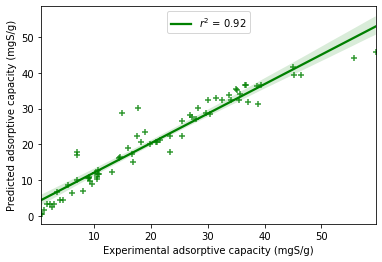

'C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML'

In [47]:
ax = sns.regplot(y="y_pred",
                 x="y_test", 
                 color="g", 
                 marker="+",
                 line_kws={'label':'$r^2$ = {:.2f}'.format(r_value**2)},
                 data = plot_data)

plt.ylabel('Predicted adsorptive capacity (mgS/g)')
plt.xlabel('Experimental adsorptive capacity (mgS/g)')
ax.legend(loc=9)
plt.savefig('traning_r2.pdf', format='pdf', dpi=1200)
plt.show()
os.getcwd()

In [48]:
regressor.feature_importances_.shape

(55,)

In [49]:
len(num_cols)

55

In [50]:
feature_importance = pd.DataFrame(data = {"features":num_cols, "importance":regressor.feature_importances_} )
feature_importance.to_csv("RFX_feature_importance.tsv", sep = "\t", index = False)

In [51]:
os.getcwd()

'C:\\Users\\DrewX\\Documents\\Project-Roger-Dodger\\Python-ML'

In [52]:
#regressor.feature_importances_

In [53]:
feature_importance["importance"] = round(feature_importance["importance"],5)

In [54]:
sum(feature_importance.importance)

1.0000300000000002

In [55]:
feature_importance.sort_values("importance", ascending=False)

,features,importance
26,C_0,0.36810
27,Ce,0.14294
28,oil_adsorbent_ratio,0.08053
1,Vmicro,0.05565
5,Na+,0.05279
4,Si_Al,0.04658
0,SA,0.02040
13,x_Cu+,0.01861
8,Ce+3,0.01672
51,hexadecane,0.01540


In [56]:
result = permutation_importance(regressor, X_train, y_train)

In [57]:
#result.importances_mean

In [58]:
#feature_importance_PI = pd.DataFrame(data = {"features":zeolite_final.drop(["Capacity"], axis = 1).columns, 
#                                          "importance_mean":result.importances_mean,
#                                          "importance_std": result.importances_std} )
#feature_importance_PI.to_csv("RF_feature_importance_PI.tsv", sep = "\t", index = False)

In [59]:
#?result.importances_mean

In [60]:
#feature_importance_PI["importance_mean"] = round(feature_importance_PI["importance_mean"], 5)

In [61]:
#feature_importance_PI.sort_values("importance_mean", ascending=False)

In [62]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = list(range(1,20))
# Number of features to consider at every split
max_features = list(range(1,40))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 40, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

In [63]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
#random_grid

In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\DrewX\.conda\envs\py3k\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83177246 0.90858535 0.88854735        nan
        nan        nan 0.871581          nan        nan 0.85081268
 0.90367623 0.91111209        nan 0.85409963        nan        nan
 0.81788747 0.89621395        nan 0.82786549        nan 0.8614605
        nan 0.91152114        nan        nan 0.79576873 0.88723074
 0.88715504        nan        nan 0.8867808  0.90165679        nan
 0.85853267        nan 0.86879101 0.90474076 0.85065477        nan
        nan 0.83773412 0.90145353 0.81104377 0.78370288 0.87473788
        nan        nan 0.87666888 0.77480825        nan 0.90813594
        nan        nan 0.85567851 0.82724056 0.78902287        nan
 0.85077651        nan 0.91006202 0.90428123 0.89852267 0.89694056
 0.85737356 0.8698127  0.88428619        nan 0.85168791 0.64789587
        nan        nan        nan        nan 0.

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 22, 24, 26, 28, 31,
                                                      33, 35, 37, 40, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                    

In [66]:
rf_random.best_params_

{'n_estimators': 16,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 15,
 'max_depth': 31}

In [67]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [68]:
#base_model = RandomForestRegressor(n_estimators=n_trees, max_features=n_feat, random_state=42)
#base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test)

In [69]:
#best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_train, y_train)